In [1]:
import pandas as pd
import numpy as np
import sys
import warnings

In [2]:
# Read Traing and Testing Data

train_data = pd.read_csv("Training.csv")

In [3]:
print("Training Data Shape :",train_data.shape)

Training Data Shape : (4920, 101)


In [4]:
train_data.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [5]:
train_data

,itching,skin_rash,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,muscle_wasting,vomiting,...,rusty_sputum,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,blood_in_sputum,palpitations,painful_walking,prognosis
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Psoriasis


In [6]:
train_data.prognosis.value_counts()

Peptic ulcer diseae                        120
(vertigo) Paroymsal  Positional Vertigo    120
Hepatitis C                                120
Hepatitis E                                120
GERD                                       120
Typhoid                                    120
Hypoglycemia                               120
Paralysis (brain hemorrhage)               120
hepatitis A                                120
Arthritis                                  120
Drug Reaction                              120
Osteoarthristis                            120
Bronchial Asthma                           120
Alcoholic hepatitis                        120
Gastroenteritis                            120
Tuberculosis                               120
Hepatitis B                                120
Pneumonia                                  120
Hyperthyroidism                            120
Urinary tract infection                    120
Heart attack                               120
Acne         

In [7]:
X = train_data.iloc[:, 0:100].values
y = train_data.iloc[:, -1].values
y_data = y

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Logistic Regression Model - 1

In [9]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression

train_acc = []
test_acc = []

penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'sag', 'saga']
max_iter = [1000]

max_logestic_score = 0
best_penalty = ''
best_solver = ''
best_max_iter = 0

for x in penalty:
    for y in solver:
        for z in max_iter:
            if((y == 'newton-cg' or y == 'lbfgs' or y == 'sag') and (x=='l2' or x=='none')):
                clf = LogisticRegression(penalty=x,solver=y,max_iter=z)
                clf.fit(X_train,y_train)
                y_pred = clf.predict(X_test)
                train_score = clf.score(X_train,y_train)
                score = clf.score(X_test,y_test)
                train_acc.append(train_score)
                test_acc.append(score)
                if(max_logestic_score<=score):
                    max_logestic_score =  score
                    best_penalty = x
                    best_solver = y
                    best_max_iter = z
                    
            elif(y == 'saga'):
                clf = LogisticRegression(penalty=x,solver=y,max_iter=z,l1_ratio=0.5)
                clf.fit(X_train,y_train)
                y_pred = clf.predict(X_test)
                train_score = clf.score(X_train,y_train)
                score = clf.score(X_test,y_test)
                train_acc.append(train_score)
                test_acc.append(score)
                if(max_logestic_score<=score):
                    max_logestic_score =  score
                    best_penalty = x
                    best_solver = y
                    best_max_iter = z


best_logestic_para = {'pealty' : best_penalty,'solver' : best_solver,'max_iter' : best_max_iter}

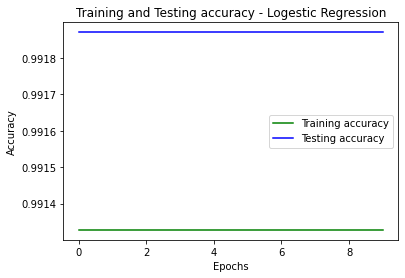

In [10]:
import matplotlib.pyplot as plt

x_axis = range(0,len(train_acc))
plt.plot(x_axis, train_acc, 'g', label='Training accuracy')
plt.plot(x_axis, test_acc, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy - Logestic Regression')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## SVM Model - 2

In [11]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


train_acc = []
test_acc = []
    
from sklearn.svm import SVC

C=[1,5,10,15,20,25]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

max_SVM_score = 0
best_C = ''
best_kernal = ''
best_gamma = 0
best_decision_function_shape = 0

for x in C:
    for y in kernel:
        for z in gamma:
            for a in decision_function_shape:
                svm_model=SVC(C=x,kernel=y,gamma=z,decision_function_shape=a,random_state=1)
                svm_model.fit(X_train,y_train)
                score = svm_model.score(X_test,y_test)
                train_score = clf.score(X_train,y_train)
                train_acc.append(train_score)
                test_acc.append(score)
                if(max_SVM_score<=score):
                    max_SVM_score =  score
                    best_c = x
                    best_kernal = y
                    best_gamma = z
                    best_decision_function_shape = a
                

best_SVM_para = {'C' : best_c,'kernal' : best_kernal,'gamma' : best_gamma,'decision_function_shape' : best_decision_function_shape}

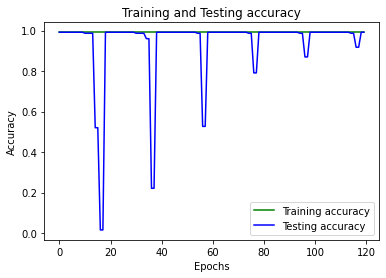

In [12]:
import matplotlib.pyplot as plt

x_axis = range(0,len(train_acc))
plt.plot(x_axis, train_acc, 'g', label='Training accuracy')
plt.plot(x_axis, test_acc, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## KNN Classification Model - 3

In [13]:
from sklearn.neighbors import KNeighborsClassifier
k=[10,20,30,40,50,60,70,80,90,100]
algo=['auto', 'ball_tree', 'kd_tree', 'brute']
distance_metric=['euclidean','manhattan','chebyshev']

train_acc = []
test_acc = []

best_k = 0
best_algo = ''
best_distance_metric = ''
max_KNN_score = 0

for x in k:
    for y in algo:
        for z in distance_metric:
            classifier = KNeighborsClassifier(n_neighbors=x,algorithm=y,metric=z)
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            score = classifier.score(X_test,y_test)
            train_score = classifier.score(X_train,y_train)
            train_acc.append(train_score)
            test_acc.append(score)
            if(max_KNN_score<=score):
                    max_KNN_score =  score
                    best_k = x
                    best_algo = y
                    best_distance_metric = z
                    
                    
best_KNN_para = {'n_neighbors' : best_k,'algorithm' : best_algo,'metric' : best_distance_metric}

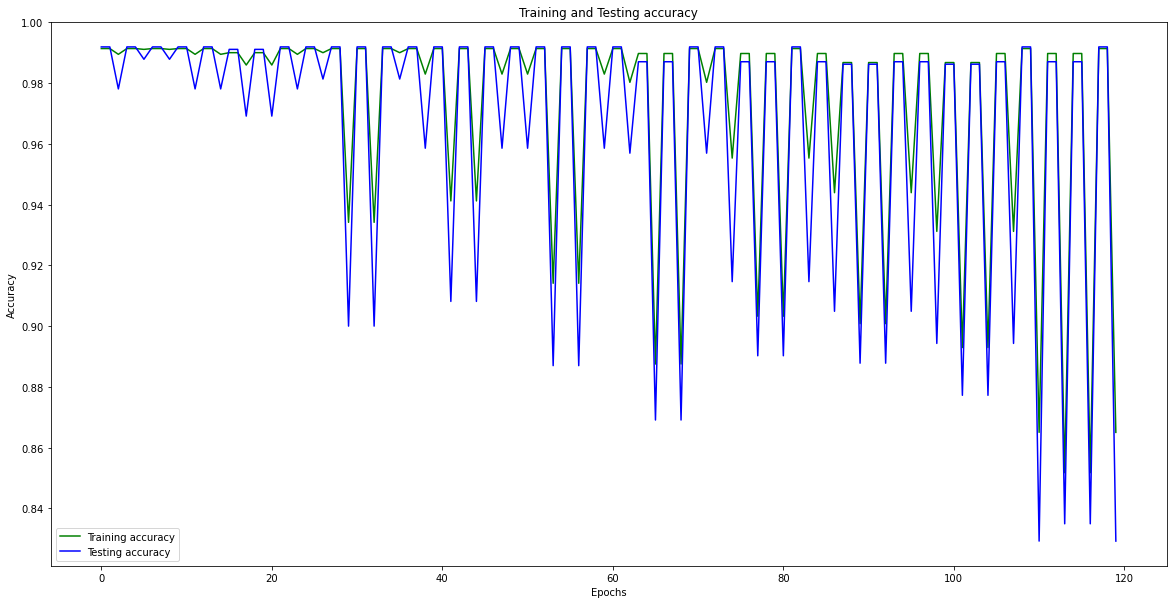

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
x_axis = range(0,len(train_acc))
plt.plot(x_axis, train_acc, 'g', label='Training accuracy')
plt.plot(x_axis, test_acc, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Decision Tree - Model 4

In [20]:
from sklearn.tree import DecisionTreeClassifier

criterion = ['entropy', 'gini']
splitter = ['best', 'random']
max_features = [10, 20, 50, 75, 100]
max_depth = [10, 20, 50]

train_acc = []
test_acc = []

best_criterion = 0
best_splitter = ''
best_max_depth = 0
best_max_features = 0
max_DT_score = 0


for x in criterion:
    for y in splitter:
        for z in max_features:
            for a in max_depth:
                clf_dec = DecisionTreeClassifier(criterion=x, splitter = y, max_features = z, max_depth = a)
                clf_dec.fit(X_train, y_train)
                y_pred_dec = clf_dec.predict(X_test)
                score = clf_dec.score(X_test,y_test)
                train_score = clf_dec.score(X_train,y_train)
                train_acc.append(train_score)
                test_acc.append(score)
            
                if(max_DT_score<=score):
                    max_DT_score =  score
                    best_criterion = x
                    best_splitter = y
                    best_max_features = z
                    best_max_depth = a
                    
                    
best_DT_para = {'criterion' : best_criterion,'splitter' : best_splitter,'max_features' : best_max_features,'max_depth' : best_max_depth}

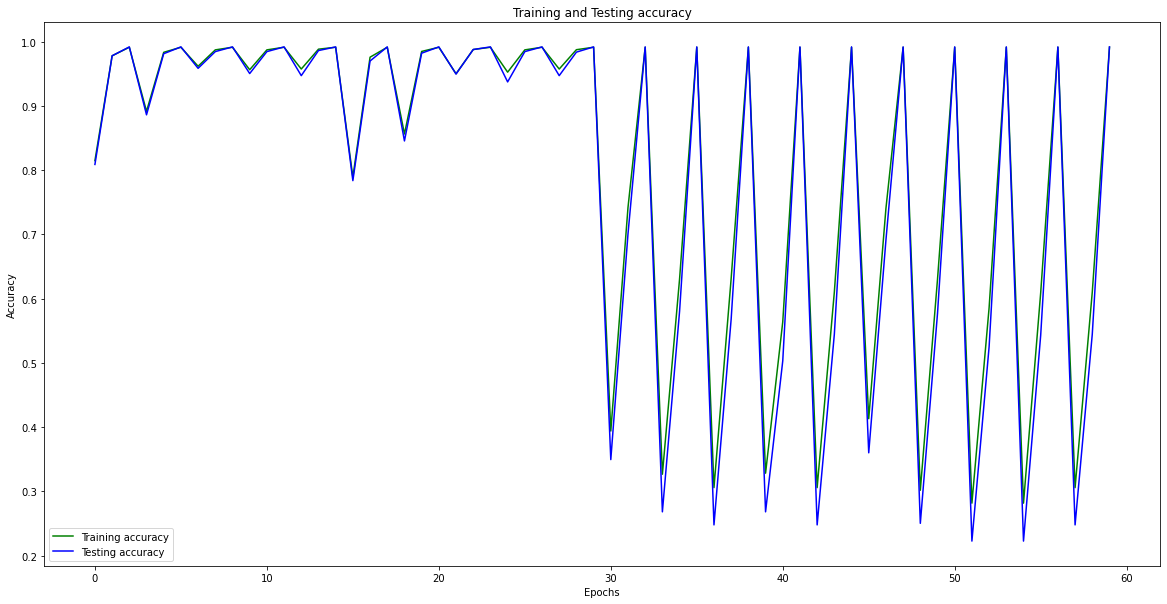

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
x_axis = range(0,len(train_acc))
plt.plot(x_axis, train_acc, 'g', label='Training accuracy')
plt.plot(x_axis, test_acc, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Random Forest - Model 5

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

sample_leaf_options = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

best_min_samples_leaf = 0
max_RF_score = 0

# for loop to iterate for each leaf size
for leaf_size in sample_leaf_options :
    model = RandomForestClassifier(n_estimators = 200, n_jobs = -1,random_state =50, min_samples_leaf = leaf_size)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    train_score = model.score(X_train,y_train)
    train_acc.append(train_score)
    test_acc.append(score)
    if(max_RF_score<=score):
        max_RF_score =  score
        best_min_samples_leaf = leaf_size


best_RF_para = {'n_estimators' : 200,'n_jobs' : -1,'random_state' : 50,'min_samples_leaf' : best_min_samples_leaf}

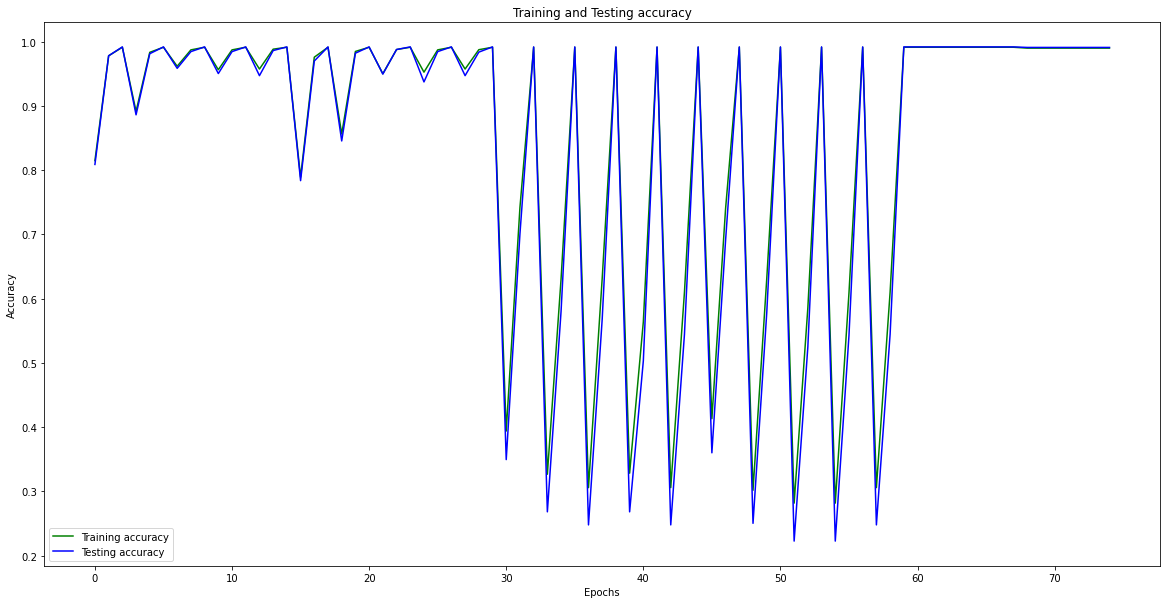

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
x_axis = range(0,len(train_acc))
plt.plot(x_axis, train_acc, 'g', label='Training accuracy')
plt.plot(x_axis, test_acc, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## XGBoost - Model 6

In [20]:
import xgboost as xgb

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
train_acc = []
test_acc = []

n_estimators=[10,20,30,50]
booster=["gbtree","gblinear","dart"]
max_depth=[10,20,40,60]

max_xgboost_score = 0
best_n_estimators = 0
best_booster = ''
best_max_depth = 0

for x in n_estimators:
    for y in booster:
        for z in max_depth:
            xg_reg = xgb.XGBClassifier(n_estimators = x,max_depth = z,booster=y, objective ='reg:logistic',learning_rate = 0.1, alpha = 0, use_label_encoder=True)
            xg_reg.fit(X_train,y_train)
            score = xg_reg.score(X_test,y_test)
            train_score = xg_reg.score(X_train,y_train)
            train_acc.append(train_score)
            test_acc.append(score)
            if(max_xgboost_score<=score):
                max_xgboost_score =  score
                best_n_estimators = x
                best_booster = y
                best_max_depth = z
            
best_XG_para = {'n_estimators' : best_n_estimators,"booster" : best_booster,'max_depth' : best_max_depth}

[08:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[08:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:16:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if 

[08:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if 

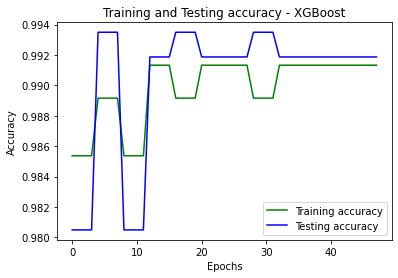

In [21]:
import matplotlib.pyplot as plt

x_axis = range(0,len(train_acc))
plt.plot(x_axis, train_acc, 'g', label='Training accuracy')
plt.plot(x_axis, test_acc, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy - XGBoost')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Finding Best Model

In [22]:
#### Model 1 = Logestic Regression

print('Logistic Regression')
print(max_logestic_score)
print(best_logestic_para)

Logistic Regression
0.991869918699187
{'pealty': 'none', 'solver': 'saga', 'max_iter': 1000}


In [23]:
#### Model 2 = SVM

print('SVM')
print(max_SVM_score)
print(best_SVM_para)

SVM
0.991869918699187
{'C': 25, 'kernal': 'rbf', 'gamma': 1, 'decision_function_shape': 'ovr'}


In [24]:
#### Model 3 = KNN Classificaion

print('KNN Classificaion')
print(max_KNN_score)
print(best_KNN_para)

KNN Classificaion
0.991869918699187
{'n_neighbors': 100, 'algorithm': 'brute', 'metric': 'manhattan'}


In [25]:
#### Model 4 = Decision Tree

print('Decision Tree')
print(max_DT_score)
print(best_DT_para)

Decision Tree
0.991869918699187
{'criterion': 'gini', 'splitter': 'random', 'max_features': 100, 'max_depth': 50}


In [26]:
#### Model 5  = Random Forest

print('Random Forest')
print(max_RF_score)
print(best_RF_para)

Random Forest
0.991869918699187
{'n_estimators': 200, 'n_jobs': -1, 'random_state': 50, 'min_samples_leaf': 8}


In [28]:
#### Model 6 = XGBoost 
print('XGBoost')
print(max_xgboost_score)
print(best_XG_para)

XGBoost
0.9934959349593496
{'n_estimators': 30, 'booster': 'gblinear', 'max_depth': 60}


# Best model

In [22]:
#Best _model
best_lr = LogisticRegression( penalty = 'none', solver = 'saga', max_iter = 1000)
best_svm = SVC(C = 25, kernel = 'rbf', gamma = 1,decision_function_shape= 'ovr')
best_knn = KNeighborsClassifier(n_neighbors = 100, algorithm ='brute', metric = 'chebyshev')
best_dt = DecisionTreeClassifier( criterion = 'gini', splitter = 'random', max_features = 100, max_depth = 50)
best_rf = RandomForestClassifier(n_estimators = 200, n_jobs = -1,random_state = 50, min_samples_leaf = 3)
best_XGBoost = xgb.XGBClassifier(n_estimators = 30,max_depth = 60,booster='gblinear', objective ='reg:logistic',learning_rate = 0.1, alpha = 0, use_label_encoder=True)

# Cross validation

In [30]:
from sklearn.model_selection import cross_val_score

In [38]:
cv_logestic = cross_val_score(best_lr,X,y_data,cv=3).mean()
print('cross validation of svm model :',cv_logestic)

cross validation of svm model : 0.9914634146341464


In [31]:
cv_svm = cross_val_score(best_svm,X,y_data,cv=3).mean()
print('cross validation of svm model :',cv_svm)

cross validation of svm model : 0.9914634146341464


In [32]:
cv_dt  = cross_val_score(best_dt,X,y_data,cv=3).mean()
print('cross validation of decision tree model :',cv_dt)

cross validation of decision tree model : 0.9914634146341464


In [33]:
cv_rf = cross_val_score(best_rf,X,y_data,cv=3).mean()
print('cross validation of random forest model :',cv_rf)

cross validation of random forest model : 0.9914634146341464


In [34]:
cv_knn = cross_val_score(best_knn,X,y_data,cv=3).mean()
print('cross validation of knn model :',cv_knn)

cross validation of knn model : 0.984959349593496


In [36]:
cv_xbg = cross_val_score(best_XGBoost,X,y_data,cv=3).mean()

[08:30:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:30:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed 

In [37]:
print('cross validation of knn model :',cv_xbg)

cross validation of knn model : 0.9902439024390244


## Graphs

No handles with labels found to put in legend.


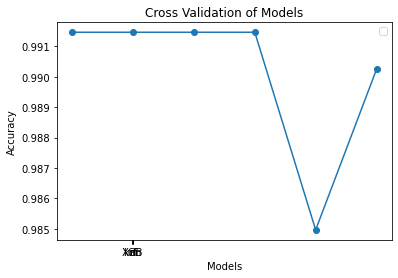

In [40]:
import matplotlib.pyplot as plt

cv_axis = [cv_logestic,cv_svm,cv_dt,cv_rf,cv_knn,cv_xbg]
model = ['logestic','svm','dt','rf','knn','XGB']
plt.plot(model,cv_axis,marker = "o")
plt.xticks(cv_axis,model)
plt.title('Cross Validation of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


As through cross validation we can observe that svm and decsion tree is having the max accuracy as compared to other, so in 
order to find the best model we will compute F1 score 
Also ,as logistic regression is taking more run time as compared to other model thus we will be ignoring Logistic Regression 
model.

# F1 SCORE 

In [41]:
from sklearn.metrics import f1_score
best_lr = LogisticRegression( penalty = 'none', solver = 'saga', max_iter = 1000)
best_lr.fit(X_train,y_train)
y_pred = best_lr.predict(X_test)
fi = f1_score(y_test,y_pred,average='weighted')
fi


0.9919757064428967

In [43]:
from sklearn.metrics import f1_score
best_svm = SVC(C = 25, kernel = 'rbf', gamma = 1,decision_function_shape= 'ovr')
best_svm.fit(X_train,y_train)
y_pred = best_svm.predict(X_test)
fi = f1_score(y_test,y_pred,average='weighted')
fi

0.9919757064428967

In [24]:
from sklearn.metrics import f1_score
best_dt = DecisionTreeClassifier( criterion = 'gini', splitter = 'random', max_features = 100, max_depth = 50)
best_dt.fit(X_train,y_train)
y_pred_dt = best_dt.predict(X_test)
fi_dt = f1_score(y_test,y_pred_dt,average='weighted')
fi_dt

0.9919757064428967

In [45]:
from sklearn.metrics import f1_score
best_rf = RandomForestClassifier(n_estimators = 200, n_jobs = -1,random_state = 50, min_samples_leaf = 3)
best_rf.fit(X_train,y_train)
y_pred_rf = best_rf.predict(X_test)
fi_rf = f1_score(y_test,y_pred_rf,average='weighted')
fi_rf

0.9919757064428967

No handles with labels found to put in legend.


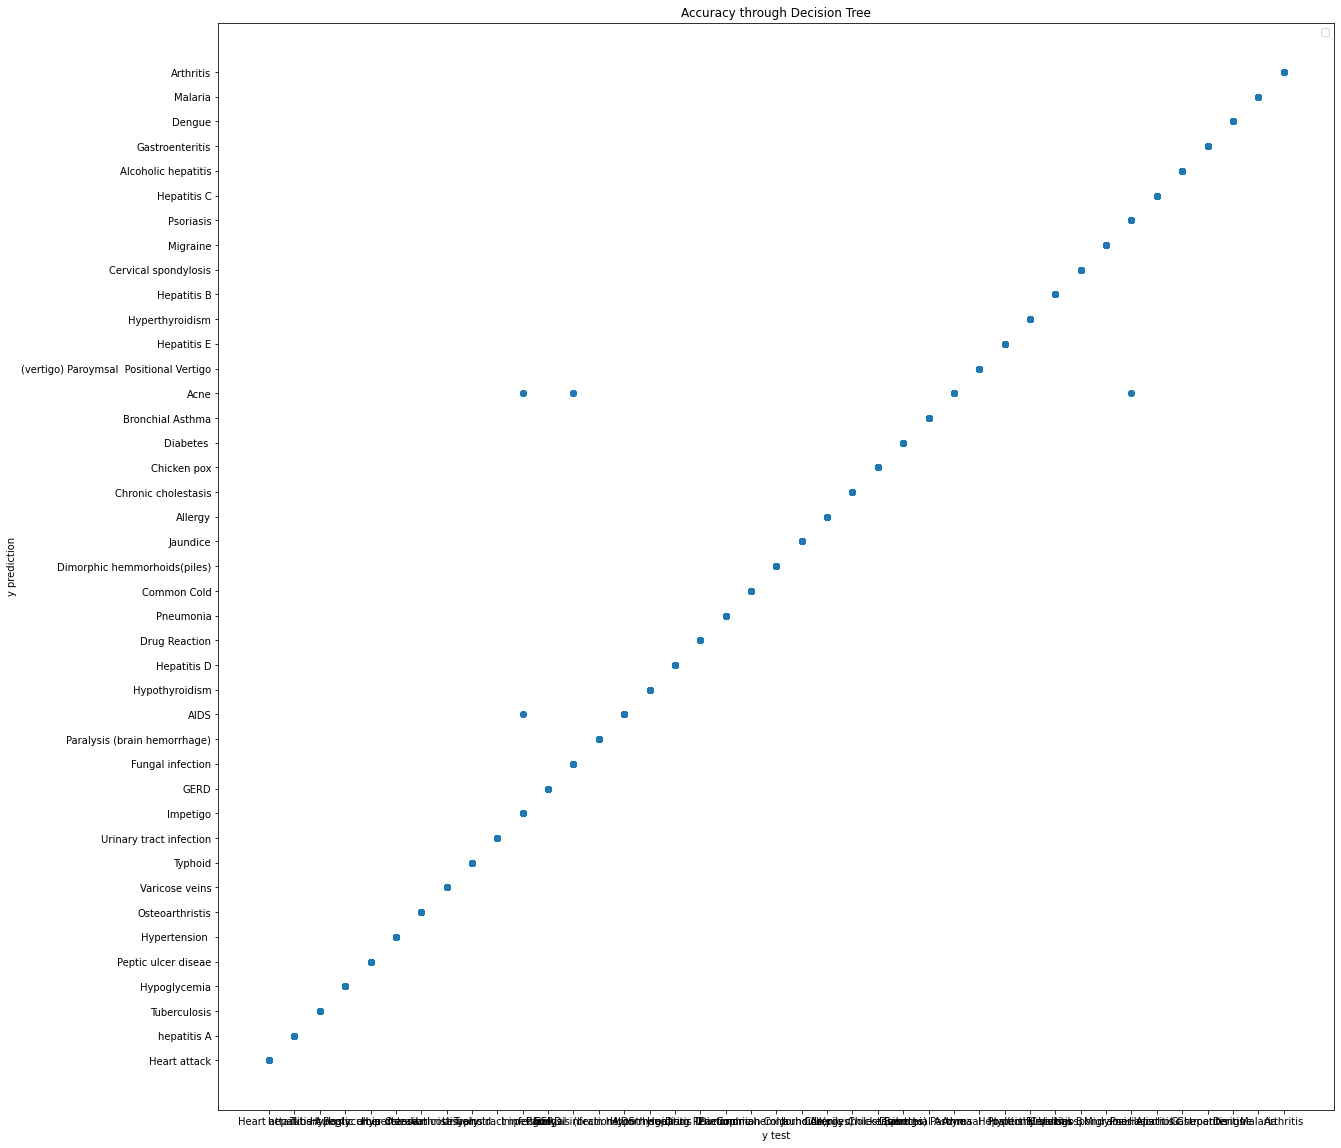

In [48]:
########################SVM 
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
plt.scatter(y_test, y_pred)
plt.title('Accuracy through Decision Tree')
plt.xlabel('y test')
plt.ylabel('y prediction')
plt.legend()
plt.show()

# ..............................................................................................................................

# Doctor and contact information of the particular prognosis

In [12]:
data_doc = pd.read_csv("prognosis&doctor1.csv")

In [13]:
data_doc.head()

,Fungal infection,Allergy,GERD,Chronic cholestasis,Drug Reaction,Peptic ulcer diseae,AIDS,Diabetes,Gastroenteritis,Bronchial Asthma,...,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo,Dept,DC
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,General Physician,Dr. Amarpreet Singh Riar : https://www.practo....
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Diabetologist,Dr. Anirban Biswas : https://www.practo.com/de...
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,Homoeopath,Dr. Mansi Arya : https://www.practo.com/delhi/...
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,Sexologist,Dr. Sunil Kumar Dwivedi : https://www.practo.c...
4,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,Ayurveda,Dr. Inderjeet Singh:https://www.practo.com/del...


In [14]:
data_doc.shape

(11, 43)

In [15]:
data_doc[["Dept","DC"]]

,Dept,DC
0,General Physician,Dr. Amarpreet Singh Riar : https://www.practo....
1,Diabetologist,Dr. Anirban Biswas : https://www.practo.com/de...
2,Homoeopath,Dr. Mansi Arya : https://www.practo.com/delhi/...
3,Sexologist,Dr. Sunil Kumar Dwivedi : https://www.practo.c...
4,Ayurveda,Dr. Inderjeet Singh:https://www.practo.com/del...
5,ENT Speacialist,Dr. Manish Munjal\thttps://www.practo.com/delh...
6,Medicine,Dr. Sudhir Bhola\thttps://www.practo.com/delhi...
7,Dietitian&Nutritionist,Dr. Sugeeta Mutreja : https://www.practo.com/d...
8,Cosmetologist & Dermatologist,Dr. S.K Kashyap\thttps://www.practo.com/delhi/...
9,Gynecologist,Dr. Gayatri Bala Juneja : https://www.practo.c...


In [16]:
dict_input = {}
for x in train_data.columns:
    dict_input[x] = 0
dict_input.pop('prognosis',None)


0

In [17]:
dict_input

{'itching': 0,
 'skin_rash': 0,
 'continuous_sneezing': 0,
 'shivering': 0,
 'chills': 0,
 'joint_pain': 0,
 'stomach_pain': 0,
 'acidity': 0,
 'muscle_wasting': 0,
 'vomiting': 0,
 'burning_micturition': 0,
 'fatigue': 0,
 'weight_gain': 0,
 'anxiety': 0,
 'cold_hands_and_feets': 0,
 'mood_swings': 0,
 'weight_loss': 0,
 'restlessness': 0,
 'lethargy': 0,
 'irregular_sugar_level': 0,
 'cough': 0,
 'high_fever': 0,
 'sunken_eyes': 0,
 'breathlessness': 0,
 'sweating': 0,
 'indigestion': 0,
 'headache': 0,
 'yellowish_skin': 0,
 'dark_urine': 0,
 'nausea': 0,
 'loss_of_appetite': 0,
 'pain_behind_the_eyes': 0,
 'back_pain': 0,
 'constipation': 0,
 'abdominal_pain': 0,
 'diarrhoea': 0,
 'mild_fever': 0,
 'yellow_urine': 0,
 'yellowing_of_eyes': 0,
 'acute_liver_failure': 0,
 'swelling_of_stomach': 0,
 'swelled_lymph_nodes': 0,
 'malaise': 0,
 'blurred_and_distorted_vision': 0,
 'phlegm': 0,
 'throat_irritation': 0,
 'redness_of_eyes': 0,
 'sinus_pressure': 0,
 'runny_nose': 0,
 'congesti

In [ ]:
more = 'yes'
for x in range(0,100):
    if(more == 'yes' or more == 'Yes'):
        symp = input("Enter Symptoms from above: ")
        if symp not in dict_input.keys():
            print("Please Enter Valid Symptom !!!!!")
            continue
        else:
            dict_input[symp]= 1
        more = input("Any more symptoms :Yes or No ")
    else:
        break

Enter Symptoms from above: bllod
Please Enter Valid Symptom !!!!!


In [28]:
input_symp = []
for x in dict_input.values():
    input_symp.append(x)
    
disease = best_dt.predict(np.array(input_symp).reshape(1,100))

In [29]:
disease = str(disease[0])
x = data_doc[[disease,"Dept","DC"]]
y = x[(data_doc[disease] ==1)]
print("So the dept and doctor dealing with your prognosis :",disease, "are")
y


So the dept and doctor dealing with your prognosis : Diabetes  are


,Diabetes,Dept,DC
0,1,General Physician,Dr. Amarpreet Singh Riar : https://www.practo....
1,1,Diabetologist,Dr. Anirban Biswas : https://www.practo.com/de...
4,1,Ayurveda,Dr. Inderjeet Singh:https://www.practo.com/del...
6,1,Medicine,Dr. Sudhir Bhola\thttps://www.practo.com/delhi...
